<a href="https://colab.research.google.com/github/BeatrizPCandido/pretalab-ciclo14-git-github/blob/main/Aula_18_Pr%C3%A1tica_com_Pandas_e_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática de exercícios de manipulação de dados utilizando Pandas e Numpy

## Objetivos

- Consolidar os aprendizados das aulas anteriores.  
- Realizar **pré-processamento, agregações, agrupamentos e análises** com dados reais.  
- Aplicar **funções personalizadas e visualizações simples** sobre o dataset de vendas de café.


## Dataset: `vendas_cafeteria.csv`

Cada linha representa uma venda individual em uma cafeteria, incluindo:
- Data e hora da compra  
- Tipo de café vendido  
- Valor pago  
- Tipo de pagamento  
- Período do dia, dia da semana e mês  

Arquivo: https://drive.google.com/file/d/1JUF9uI-nC0bbcWjBw8hnPWRcGNLfWNqI/view?usp=sharing

### Exercício 1 — Inspeção inicial

1. Importar bibliotecas e carregar o dataset

2. Mostre as 5 primeiras linhas do dataset.

3. Verifique o tipo de dados de cada coluna.

4. Verifique se há valores ausentes.

In [2]:
import pandas as pd

vendas = pd.read_csv('vendas_cafeteria.csv')

In [3]:
#Mostre as 5 primeiras linhas do dataset.
vendas.head()

,hora_do_dia,tipo_pagamento,valor,nome_cafe,periodo_do_dia,dia_da_semana,mes,ordem_dia,ordem_mes,data,hora
0,10,cartão,38.7,Latte,Manhã,Sex,Março,5,3,2024-03-01,10:15:50.520000
1,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:19:22.539000
2,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:20:18.089000
3,13,cartão,28.9,Café Americano,Tarde,Sex,Março,5,3,2024-03-01,13:46:33.006000
4,13,cartão,38.7,Latte,Tarde,Sex,Março,5,3,2024-03-01,13:48:14.626000


In [4]:
#Verifique o tipo de dados de cada coluna.
vendas.dtypes

,0
hora_do_dia,int64
tipo_pagamento,object
valor,float64
nome_cafe,object
periodo_do_dia,object
dia_da_semana,object
mes,object
ordem_dia,int64
ordem_mes,int64
data,object


In [6]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hora_do_dia     3547 non-null   int64  
 1   tipo_pagamento  2698 non-null   object 
 2   valor           3547 non-null   float64
 3   nome_cafe       3547 non-null   object 
 4   periodo_do_dia  3547 non-null   object 
 5   dia_da_semana   3547 non-null   object 
 6   mes             3547 non-null   object 
 7   ordem_dia       3547 non-null   int64  
 8   ordem_mes       3547 non-null   int64  
 9   data            3547 non-null   object 
 10  hora            3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [5]:
#Verifique se há valores ausentes.
vendas.isnull().sum()

,0
hora_do_dia,0
tipo_pagamento,849
valor,0
nome_cafe,0
periodo_do_dia,0
dia_da_semana,0
mes,0
ordem_dia,0
ordem_mes,0
data,0


### Exercício 2 — Padronização e limpeza básica

1. Verifique se há valores ausentes na coluna `tipo_pagamento`.

2. Substitua qualquer valor ausente em `tipo_pagamento` por "indefinido".

3. Verifique novamente se ainda há valores nulos.

In [7]:
#Verifique se há valores ausentes na coluna tipo_pagamento.
vendas['tipo_pagamento'].isnull().sum()

np.int64(849)

In [8]:
# Substitua qualquer valor ausente em tipo_pagamento por "indefinido".
vendas['tipo_pagamento'].fillna('indefinido', inplace=True)

/tmp/ipython-input-2666151634.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vendas['tipo_pagamento'].fillna('indefinido', inplace=True)


In [9]:
# Verifique novamente se ainda há valores nulos.
vendas.isnull().sum()

,0
hora_do_dia,0
tipo_pagamento,0
valor,0
nome_cafe,0
periodo_do_dia,0
dia_da_semana,0
mes,0
ordem_dia,0
ordem_mes,0
data,0


### Exercício 3
1. Quais são todos os tipos de cafés vendidos?

2. Qual tipo de café teve o maior número de vendas?

3. Qual tipo de café gerou o maior faturamento total?

4. Qual a média de valor por tipo de café?

In [12]:
# Quais são todos os tipos de cafés vendidos?
vendas['nome_cafe'].unique()

array(['Latte', 'Chocolate Quente', 'Café Americano',
       'Americano com Leite', 'Cocoa', 'Cortado', 'Expresso', 'Capuccino'],
      dtype=object)

In [13]:
# Qual tipo de café teve o maior número de vendas?
vendas['nome_cafe'].value_counts()

,count
nome_cafe,
Americano com Leite,809
Latte,757
Café Americano,564
Capuccino,486
Cortado,287
Chocolate Quente,276
Cocoa,239
Expresso,129


In [22]:
# Qual tipo de café gerou o maior faturamento total?
vendas.groupby('nome_cafe')['valor'].sum().sort_values(ascending=False)


,valor
nome_cafe,
Latte,26875.30
Americano com Leite,24751.12
Capuccino,17439.14
Café Americano,14650.26
Chocolate Quente,9933.46
Cocoa,8521.16
Cortado,7384.86
Expresso,2690.28


In [23]:
#Qual a média de valor por tipo de café?
vendas.groupby('nome_cafe')['valor'].mean().sort_values(ascending=False)


,valor
nome_cafe,
Chocolate Quente,35.990797
Capuccino,35.883004
Cocoa,35.653389
Latte,35.502378
Americano com Leite,30.594710
Café Americano,25.975638
Cortado,25.731220
Expresso,20.854884


### Exercício 4

1. Qual total de vendas por dia da semana? Ordene o resultado de forma crescente.

2. Em qual horário do dia ocorrem mais vendas?

3. Qual o valor médio das vendas por mês?

4. Há diferença no ticket médio entre pagamentos em cartão e dinheiro?

In [28]:
# Qual total de vendas por dia da semana? Ordene o resultado de forma crescente.
vendas['dia_da_semana'].value_counts()

,count
dia_da_semana,
Ter,572
Seg,544
Sex,532
Qui,510
Qua,500
Sáb,470
Dom,419


In [29]:
vendas.groupby('dia_da_semana')['valor'].mean().sort_values(ascending=False)

,valor
dia_da_semana,
Seg,31.917463
Dom,31.828305
Ter,31.762902
Sex,31.583947
Qui,31.551765
Qua,31.500920
Sáb,31.347915


In [30]:
# Em qual horário do dia ocorrem mais vendas?
vendas['periodo_do_dia'].value_counts()

,count
periodo_do_dia,
Tarde,1205
Manhã,1181
Night,1161


In [31]:
vendas.groupby('periodo_do_dia')['valor'].mean().sort_values(ascending=False)

,valor
periodo_do_dia,
Night,32.890904
Tarde,31.643187
Manhã,30.422693


In [32]:
# Qual o valor médio das vendas por mês?
vendas.groupby('mes')['valor'].mean().sort_values(ascending=False)

,valor
mes,
Junho,34.160359
Abril,34.045000
Maio,33.877261
Novembro,33.168108
Outubro,32.608357
Março,32.169312
Janeiro,31.835124
Dezembro,31.805946
Fevereiro,31.242270


In [27]:
# Há diferença no ticket médio entre pagamentos em cartão e dinheiro?
vendas.groupby('tipo_pagamento')['valor'].mean()


,valor
tipo_pagamento,
cartão,31.743364
dinheiro,31.691250
indefinido,31.340188


### Exercício 5

1. Crie uma nova coluna chamada valor_total, que some o valor pago com 10% de taxa de serviço.

2. Crie uma nova coluna categoria_valor com:

- "alta" se o valor for maior que R$40,

- "média" se entre R$20 e R$40,

- "baixa" se menor que R$20.

3. Responda: Quantas vendas pertencem a cada categoria?

In [33]:
# Crie uma nova coluna chamada valor_total, que some o valor pago com 10% de taxa de serviço.
vendas['valor_total'] = vendas['valor'] * 1.1
vendas.head()

,hora_do_dia,tipo_pagamento,valor,nome_cafe,periodo_do_dia,dia_da_semana,mes,ordem_dia,ordem_mes,data,hora,valor_total
0,10,cartão,38.7,Latte,Manhã,Sex,Março,5,3,2024-03-01,10:15:50.520000,42.57
1,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:19:22.539000,42.57
2,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:20:18.089000,42.57
3,13,cartão,28.9,Café Americano,Tarde,Sex,Março,5,3,2024-03-01,13:46:33.006000,31.79
4,13,cartão,38.7,Latte,Tarde,Sex,Março,5,3,2024-03-01,13:48:14.626000,42.57


In [34]:
# Crie uma nova coluna categoria_valor com:
# "alta" se o valor for maior que R$40,
# "média" se entre R$20 e R$40,
# "baixa" se menor que R$20.
def categoria_valor(valor):
    if valor > 40:
        return 'alta'
    elif valor >= 20:
        return 'média'
    else:
        return 'baixa'

In [41]:
categoria_valor(30)

'média'

In [36]:
# Responda: Quantas vendas pertencem a cada categoria?
vendas['categoria_valor'] = vendas['valor'].apply(categoria_valor)
vendas['categoria_valor'].value_counts()


,count
categoria_valor,
média,3511
baixa,36


### Exercício 6 - Visualização de dados com Pandas

1. Crie um gráfico de barras mostrando o **faturamento total** por tipo de café.

2. Crie um gráfico mostrando como as vendas estão distribuídas entre os tipos de pagamento.

3. Crie um gráfico de linha mostrando o faturamento total diário ao longo do tempo.

- Adicione título no gráfico e nos eixos, bem como grid no gráfico de linha.

<Axes: xlabel='nome_cafe'>

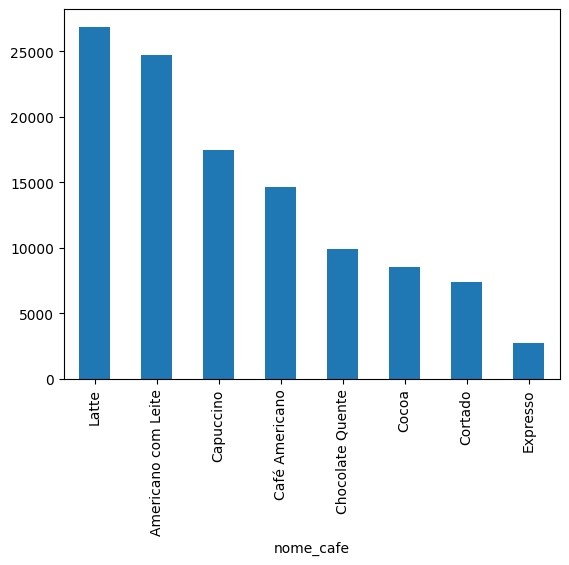

In [42]:
#Crie um gráfico de barras mostrando o faturamento total por tipo de café ordenar.

vendas.groupby('nome_cafe')['valor'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='tipo_pagamento'>

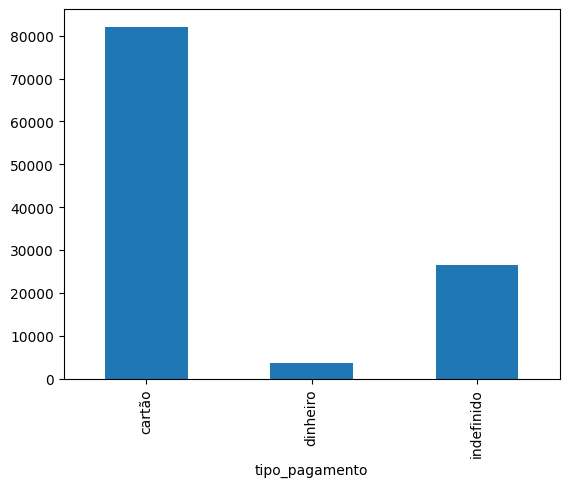

In [38]:
# Crie um gráfico mostrando como as vendas estão distribuídas entre os tipos de pagamento
vendas.groupby('tipo_pagamento')['valor'].sum().plot(kind='bar')


<Axes: xlabel='data'>

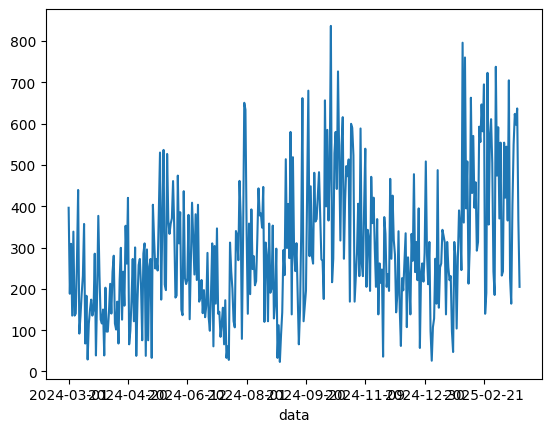

In [39]:
# Crie um gráfico de linha mostrando o faturamento total diário ao longo do tempo.
vendas.groupby('data')['valor'].sum().plot(kind='line')


<Axes: title={'center': 'Faturamento diário'}, xlabel='data'>

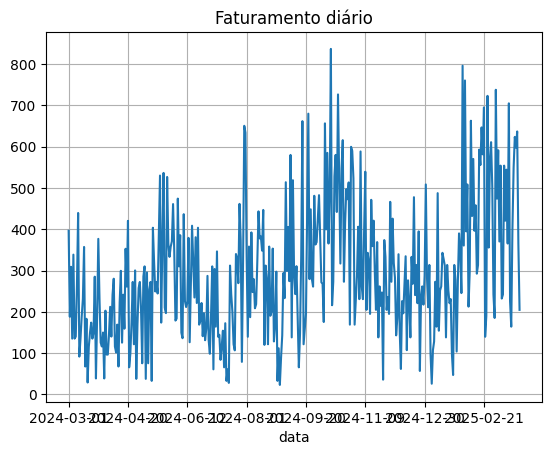

In [40]:
# Adicione título no gráfico e nos eixos, bem como grid no gráfico de linha.
vendas.groupby('data')['valor'].sum().plot(kind='line', title='Faturamento diário', grid=True)

